In [3]:
import numpy
%matplotlib notebook
from matplotlib import pyplot
import bokeh.plotting as bplot
bplot.output_notebook()

BokehJS successfully loaded.

In [4]:
from soapy import atmosphere, WFS, confParse
from aotools import circle
from aotools.wfs import wfslib

In [5]:
SOAPY_CONF = "conf/test_conf.py"

In [9]:
# Get soapy config
config = confParse.Configurator(SOAPY_CONF)
config.loadSimParams()

# Only use 1 screen
config.atmos.scrnNo = 1

In [53]:
# Set some parameters explicitly
WIND_SPEED = 1
WIND_DIR = 0
R0 = 1
PUPIL_SIZE = 128
PXL_SCALE = 1./128
LARGE_SCRN_SIZE = 4096
FRAME_TIME = 0.01

N_ITERS = 10000

In [54]:
telDiam = PUPIL_SIZE * PXL_SCALE
config.tel.telDiam = telDiam

config.atmos.windDirs[0] = WIND_DIR
config.atmos.windDirs[0] = WIND_SPEED
config.atmos.r0 = R0
config.atmos.wholeScrnSize = LARGE_SCRN_SIZE

config.sim.pupilSize = 128
config.sim.loopTime = FRAME_TIME
atmos = atmosphere.atmos(config.sim, config.atmos)


In [55]:
atmos = atmosphere.atmos(config.sim, config.atmos)

In [56]:
allScrns = numpy.zeros((N_ITERS, PUPIL_SIZE, PUPIL_SIZE))
pad = (config.sim.simSize-config.sim.pupilSize)/2.
for i in range(N_ITERS):
    allScrns[i] = atmos.moveScrns()[0][pad:-pad, pad:-pad]

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [57]:
tPs_2d = numpy.fft.fft(allScrns, axis=0)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


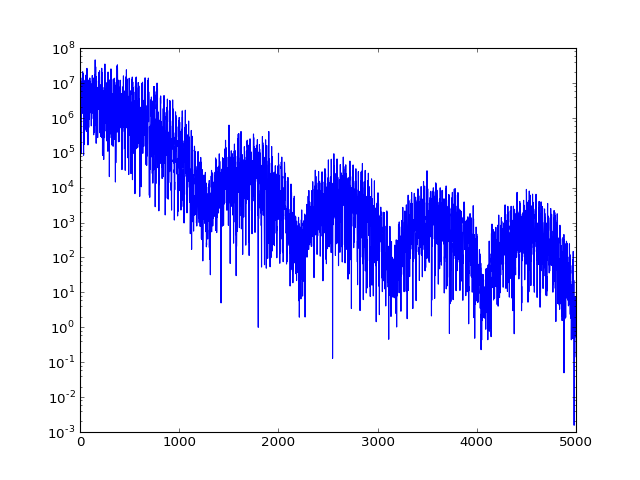

In [62]:
freqs = 
pyplot.semilogy(abs(tPs_2d.mean((1,2))[:N_ITERS/2.])**2)

In [ ]:
tPs_